In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# read excel files
coverage = pd.read_excel("C:/sachin/Python/Vaccination/coverage-data.xlsx")
incidence = pd.read_excel("C:/sachin/Python/Vaccination/incidence-rate-data.xlsx")
reported = pd.read_excel("C:/sachin/Python/Vaccination/reported-cases-data.xlsx")
vaccine_int = pd.read_excel("C:/sachin/Python/Vaccination/vaccine-introduction-data.xlsx")
vaccine_sch = pd.read_excel("C:/sachin/Python/Vaccination/vaccine-schedule-data.xlsx")

### Cleaning the coverage data

In [3]:
coverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399859 entries, 0 to 399858
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   GROUP                          399859 non-null  object 
 1   CODE                           399858 non-null  object 
 2   NAME                           398584 non-null  object 
 3   YEAR                           399858 non-null  float64
 4   ANTIGEN                        399858 non-null  object 
 5   ANTIGEN_DESCRIPTION            399858 non-null  object 
 6   COVERAGE_CATEGORY              399858 non-null  object 
 7   COVERAGE_CATEGORY_DESCRIPTION  399858 non-null  object 
 8   TARGET_NUMBER                  79030 non-null   float64
 9   DOSES                          79327 non-null   float64
 10  COVERAGE                       230477 non-null  float64
dtypes: float64(4), object(7)
memory usage: 33.6+ MB


In [4]:
coverage.head(3)

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,ADMIN,Administrative coverage,NaN,NaN,NaN
1,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,OFFICIAL,Official coverage,NaN,NaN,NaN
2,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.52


<Axes: >

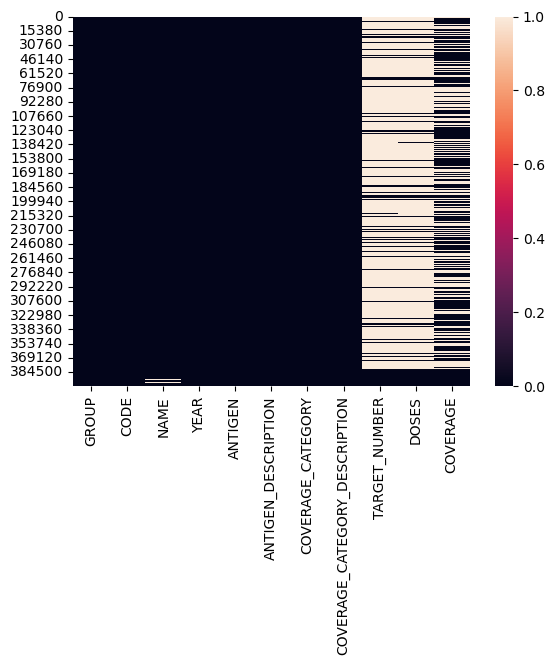

In [5]:
sns.heatmap(coverage.isnull())

In [6]:
coverage.describe()

,YEAR,TARGET_NUMBER,DOSES,COVERAGE
count,399858.000000,7.903000e+04,7.932700e+04,230477.000000
mean,2009.207489,2.780192e+08,3.467241e+06,78.032914
std,11.720530,5.415244e+10,1.125676e+07,74.891697
min,1980.000000,0.000000e+00,-2.222882e+08,0.000000
25%,2002.000000,3.281400e+04,1.446900e+04,69.320000
50%,2012.000000,3.178715e+05,1.522120e+05,88.790000
75%,2019.000000,2.493048e+06,9.710185e+05,96.000000
max,2023.000000,1.170000e+13,1.266052e+08,32000.000000


In [7]:
coverage.isnull().sum()

GROUP                                 0
CODE                                  1
NAME                               1275
YEAR                                  1
ANTIGEN                               1
ANTIGEN_DESCRIPTION                   1
COVERAGE_CATEGORY                     1
COVERAGE_CATEGORY_DESCRIPTION         1
TARGET_NUMBER                    320829
DOSES                            320532
COVERAGE                         169382
dtype: int64

In [8]:
coverage['COVERAGE'].fillna(coverage['COVERAGE'].mean(), inplace=True)
coverage['TARGET_NUMBER'].fillna(coverage['TARGET_NUMBER'].mean(), inplace=True)
coverage['DOSES'].fillna(coverage['DOSES'].mean(), inplace = True)
coverage['YEAR']=pd.to_datetime(coverage['YEAR']).round('Y')
coverage['YEAR'] = coverage['YEAR'].dt.year
coverage['TARGET_NUMBER'] = coverage['TARGET_NUMBER'].astype(int)
coverage['DOSES'] = coverage['DOSES'].astype(int)
coverage['COVERAGE'] = coverage['COVERAGE'].astype(int)
coverage['NAME'].fillna(coverage['NAME'].mode()[0], inplace=True)
coverage['NAME'] = coverage['NAME'].str.strip()


C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_6876\1595287864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coverage['COVERAGE'].fillna(coverage['COVERAGE'].mean(), inplace=True)
C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_6876\1595287864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [20]:
coverage.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
399853    False
399854    False
399855    False
399856    False
399857    False
Length: 399858, dtype: bool

In [10]:
coverage.dropna(inplace=True)

### Inserting data in Mysql database

In [53]:
import mysql.connector

In [54]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',   
    password="Sh!ne$777Luck",
)
cursor = conn.cursor()

In [55]:
# crate database
cursor.execute("CREATE DATABASE IF NOT EXISTS vaccination_db")

In [56]:
# use database
cursor.execute("use vaccination_db")

In [183]:
# creating table of coverage
cursor.execute(
    """CREATE TABLE IF NOT EXISTS coverage (
        `GROUP` VARCHAR(255),
        CODE VARCHAR(255),
        NAME VARCHAR(255),
        YEAR INT,
        ANTIGEN VARCHAR(255),
        ANTIGEN_DESCRIPTION VARCHAR(255),
        COVERAGE_CATEGORY VARCHAR(255),
        COVERAGE_CATEGORY_DESCRIPTION VARCHAR(255),
        TARGET_NUMBER INT,
        DOSES INT,
        COVERAGE INT
    );"""
)
conn.commit()

In [184]:
for i, row in coverage.iterrows():
    cursor.execute("""
        INSERT INTO coverage (`GROUP`, CODE, NAME, YEAR, ANTIGEN, ANTIGEN_DESCRIPTION, COVERAGE_CATEGORY, COVERAGE_CATEGORY_DESCRIPTION, TARGET_NUMBER, DOSES, COVERAGE)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(row))

conn.commit()  

### Cleaning the incidence data

In [11]:
incidence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84946 entries, 0 to 84945
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GROUP                84946 non-null  object 
 1   CODE                 84945 non-null  object 
 2   NAME                 84945 non-null  object 
 3   YEAR                 84945 non-null  float64
 4   DISEASE              84945 non-null  object 
 5   DISEASE_DESCRIPTION  84945 non-null  object 
 6   DENOMINATOR          84945 non-null  object 
 7   INCIDENCE_RATE       61584 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.2+ MB


In [12]:
incidence.head(3)

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3


In [13]:
incidence.isnull().sum()

GROUP                      0
CODE                       1
NAME                       1
YEAR                       1
DISEASE                    1
DISEASE_DESCRIPTION        1
DENOMINATOR                1
INCIDENCE_RATE         23362
dtype: int64

<Axes: >

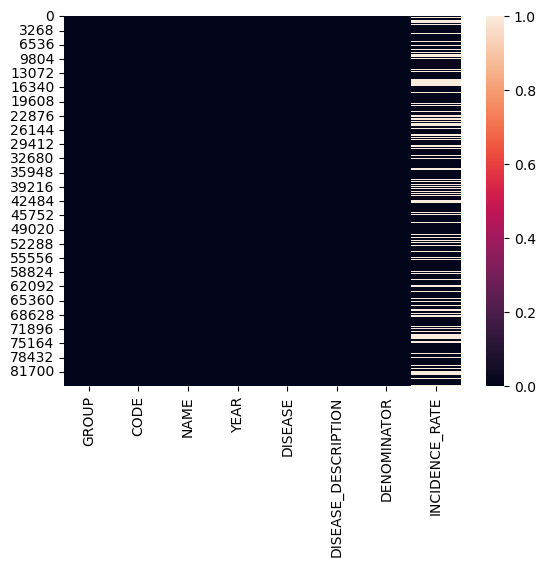

In [21]:
sns.heatmap(incidence.isnull())

In [15]:
incidence.dropna(inplace=True)

In [16]:
incidence.describe()

,YEAR,INCIDENCE_RATE
count,61584.000000,61584.000000
mean,2005.435698,109.448781
std,12.056504,992.276983
min,1980.000000,0.000000
25%,1997.000000,0.000000
50%,2007.000000,0.000000
75%,2016.000000,4.600000
max,2023.000000,69101.300000


In [17]:
incidence['INCIDENCE_RATE'].fillna(incidence['INCIDENCE_RATE'].mean(), inplace=True)

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_3464\1895834551.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  incidence['INCIDENCE_RATE'].fillna(incidence['INCIDENCE_RATE'].mean(), inplace=True)


In [18]:
incidence.head(3)

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3


In [19]:
incidence["INCIDENCE_RATE"] = incidence["INCIDENCE_RATE"].astype(int)
incidence["YEAR"] = incidence["YEAR"].astype('int64')

In [20]:
incidence["DENOMINATOR"] = pd.to_numeric(incidence["DENOMINATOR"], errors='coerce')

In [21]:
incidence["DENOMINATOR"].fillna(10000, inplace=True) 

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_3464\2076954192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  incidence["DENOMINATOR"].fillna(10000, inplace=True)


In [22]:
incidence["DENOMINATOR"] = incidence["DENOMINATOR"].astype(int)

In [23]:
incidence.fillna("", inplace=True)

In [198]:
cursor.execute(
    """CREATE TABLE IF NOT EXISTS incidence (
        `GROUP` VARCHAR(255),
        CODE VARCHAR(255),
        NAME VARCHAR(255),
        YEAR INT,
        DISEASE VARCHAR(255),
        DISEASE_DESCRIPTION VARCHAR(255),
        DENOMINATOR INT,
        INCIDENCE_RATE INT
    );"""   
)
conn.commit()   

In [199]:
for i, row in incidence.iterrows():
    cursor.execute("""
        INSERT INTO incidence (`GROUP`, CODE, NAME, YEAR, DISEASE, DISEASE_DESCRIPTION, DENOMINATOR, INCIDENCE_RATE)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(row.values))
    conn.commit()

In [24]:
reported.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84870 entries, 0 to 84869
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GROUP                84870 non-null  object 
 1   CODE                 84869 non-null  object 
 2   NAME                 84869 non-null  object 
 3   YEAR                 84869 non-null  float64
 4   DISEASE              84869 non-null  object 
 5   DISEASE_DESCRIPTION  84869 non-null  object 
 6   CASES                65470 non-null  float64
dtypes: float64(2), object(5)
memory usage: 4.5+ MB


In [25]:
reported.head(3)

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,1.0


In [26]:
reported.isnull().sum()

GROUP                      0
CODE                       1
NAME                       1
YEAR                       1
DISEASE                    1
DISEASE_DESCRIPTION        1
CASES                  19400
dtype: int64

In [27]:
reported.describe()

,YEAR,CASES
count,84869.000000,6.547000e+04
mean,2004.108261,4.472409e+03
std,12.591396,6.114455e+04
min,1980.000000,0.000000e+00
25%,1994.000000,0.000000e+00
50%,2005.000000,1.000000e+00
75%,2015.000000,6.300000e+01
max,2023.000000,4.583555e+06


In [28]:
reported['CASES'].fillna(reported['CASES'].mean(), inplace=True)

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_3464\1206716272.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reported['CASES'].fillna(reported['CASES'].mean(), inplace=True)


In [205]:
#crate table of reported cases
cursor.execute(
    """CREATE TABLE IF NOT EXISTS reported (
        `GROUP` VARCHAR(255),
        CODE VARCHAR(255),
        NAME VARCHAR(255),
        YEAR INT,
        DISEASE VARCHAR(255),
        DISEASE_DESCRIPTION VARCHAR(255),
        CASES INT
    );"""
)
conn.commit()

In [206]:
# insert data into reported cases table
for i, row in reported.iterrows():
    cursor.execute("""
        INSERT INTO reported (`GROUP`, CODE, NAME, YEAR, DISEASE, DISEASE_DESCRIPTION, CASES)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, tuple(row.values))
    conn.commit()

In [29]:
vaccine_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138321 entries, 0 to 138320
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ISO_3_CODE   138321 non-null  object 
 1   COUNTRYNAME  138320 non-null  object 
 2   WHO_REGION   138320 non-null  object 
 3   YEAR         138320 non-null  float64
 4   DESCRIPTION  138320 non-null  object 
 5   INTRO        138320 non-null  object 
dtypes: float64(1), object(5)
memory usage: 6.3+ MB


In [30]:
vaccine_int.head(3)

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO
0,AFG,Afghanistan,EMRO,2023.0,aP (acellular pertussis) vaccine,No
1,AFG,Afghanistan,EMRO,2023.0,Hepatitis A vaccine,No
2,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes


In [31]:
vaccine_int.dtypes

ISO_3_CODE      object
COUNTRYNAME     object
WHO_REGION      object
YEAR           float64
DESCRIPTION     object
INTRO           object
dtype: object

In [32]:
vaccine_int.isnull().sum()

ISO_3_CODE     0
COUNTRYNAME    1
WHO_REGION     1
YEAR           1
DESCRIPTION    1
INTRO          1
dtype: int64

In [33]:
vaccine_int.dropna(inplace=True)

In [34]:

vaccine_int["YEAR"] = vaccine_int["YEAR"].astype(int)

In [260]:
# vaccine_int.head(3)

In [261]:
# vaccine_int.nunique()

In [262]:
# vaccine_int["INTRO"] = vaccine_int["INTRO"].astype(str)

In [36]:
# create table of vaccine_int 
cursor.execute(
    """CREATE TABLE IF NOT EXISTS vaccine_int (
        `ISO_3_CODE` VARCHAR(255),
        COUNTRYNAME VARCHAR(255),
        WHO_REGION VARCHAR(255),
        YEAR INT,
        DESCRIPTION VARCHAR(255),
        INTRO VARCHAR(255)
    );"""
)
conn.commit()

In [41]:
for i, row in vaccine_int.iterrows():
    cursor.execute("""
        INSERT INTO vaccine_int (ISO_3_CODE, COUNTRYNAME, WHO_REGION, YEAR, DESCRIPTION, INTRO)
        VALUES (%s, %s, %s, %s, %s, %s)
    """, tuple(row.values))
conn.commit()   

In [23]:
vaccine_int.columns

Index(['ISO_3_CODE', 'COUNTRYNAME', 'WHO_REGION', 'YEAR', 'DESCRIPTION',
       'INTRO'],
      dtype='object')

In [22]:
vaccine_sch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8053 entries, 0 to 8052
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ISO_3_CODE             8053 non-null   object 
 1   COUNTRYNAME            8052 non-null   object 
 2   WHO_REGION             8052 non-null   object 
 3   YEAR                   8052 non-null   float64
 4   VACCINECODE            8052 non-null   object 
 5   VACCINE_DESCRIPTION    8052 non-null   object 
 6   SCHEDULEROUNDS         8052 non-null   float64
 7   TARGETPOP              3795 non-null   object 
 8   TARGETPOP_DESCRIPTION  8052 non-null   object 
 9   GEOAREA                8022 non-null   object 
 10  AGEADMINISTERED        7007 non-null   object 
 11  SOURCECOMMENT          5139 non-null   object 
dtypes: float64(2), object(10)
memory usage: 755.1+ KB


In [37]:
vaccine_sch.head(3)

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT
0,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1.0,NaN,General/routine,NATIONAL,M2,NaN
1,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2.0,NaN,General/routine,NATIONAL,M4,NaN
2,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3.0,NaN,General/routine,NATIONAL,M6,NaN


<Axes: >

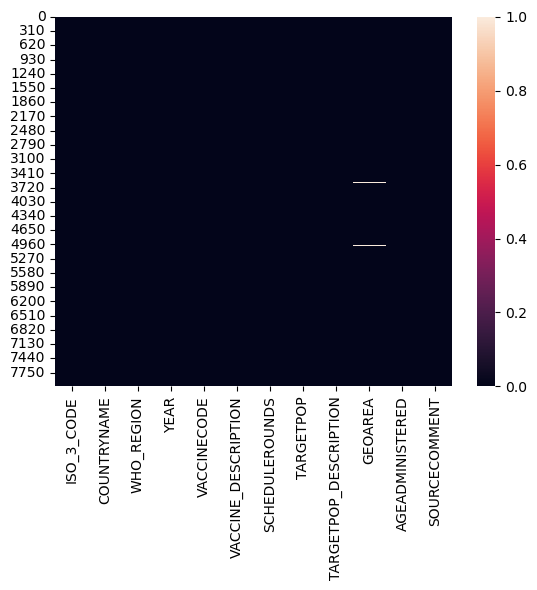

In [34]:
sns.heatmap(vaccine_sch.isnull())

In [25]:
vaccine_sch.describe()

,YEAR,SCHEDULEROUNDS
count,8052.000000,8052.000000
mean,2022.941505,2.053403
std,0.441237,1.316560
min,2019.000000,1.000000
25%,2023.000000,1.000000
50%,2023.000000,2.000000
75%,2023.000000,3.000000
max,2023.000000,7.000000


In [35]:
# filling the misssing values
mode_value = vaccine_sch['TARGETPOP'].mode()[0]
vaccine_sch['TARGETPOP'].fillna(mode_value, inplace=True)
mode = vaccine_sch['AGEADMINISTERED'].mode()[0]
vaccine_sch['AGEADMINISTERED'].fillna(mode, inplace=True)
mode_so = vaccine_sch['SOURCECOMMENT'].mode()[0]
vaccine_sch['SOURCECOMMENT'].fillna(mode_so, inplace=True)
mode_v = vaccine_sch['GEOAREA'].mode()[0]
vaccine_sch['GEOAREA'].fillna(mode_v, inplace=True) 


C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_6876\2093348482.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vaccine_sch['GEOAREA'].fillna(mode_v, inplace=True)


In [27]:
vaccine_sch.count()

ISO_3_CODE               8053
COUNTRYNAME              8052
WHO_REGION               8052
YEAR                     8052
VACCINECODE              8052
VACCINE_DESCRIPTION      8052
SCHEDULEROUNDS           8052
TARGETPOP                8053
TARGETPOP_DESCRIPTION    8052
GEOAREA                  8022
AGEADMINISTERED          8053
SOURCECOMMENT            8053
dtype: int64

In [39]:
vaccine_sch.isnull().sum()

ISO_3_CODE               0
COUNTRYNAME              0
WHO_REGION               0
YEAR                     0
VACCINECODE              0
VACCINE_DESCRIPTION      0
SCHEDULEROUNDS           0
TARGETPOP                0
TARGETPOP_DESCRIPTION    0
GEOAREA                  0
AGEADMINISTERED          0
SOURCECOMMENT            0
dtype: int64

In [38]:
vaccine_sch.dropna(inplace=True)

In [36]:
vaccine_sch 

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT
0,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1.0,RISKGROUPS,General/routine,NATIONAL,M2,0-11 mois
1,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2.0,RISKGROUPS,General/routine,NATIONAL,M4,0-11 mois
2,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3.0,RISKGROUPS,General/routine,NATIONAL,M6,0-11 mois
3,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4.0,B_2YL_W,General/routine,NATIONAL,M15,0-11 mois
4,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,General/routine,NATIONAL,Y4,0-11 mois
...,...,...,...,...,...,...,...,...,...,...,...,...
8048,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,3.0,RISKGROUPS,General/routine,NATIONAL,M18,M6-M59
8049,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,4.0,RISKGROUPS,General/routine,NATIONAL,M24,M6-M59
8050,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,5.0,RISKGROUPS,General/routine,NATIONAL,M30,M6-M59
8051,ZWE,Zimbabwe,AFRO,2023.0,VITAMINA,Vitamin A supplements,6.0,RISKGROUPS,General/routine,NATIONAL,M36,M6-M59


In [57]:
# create table of vaccine_sch
cursor.execute(
    """CREATE TABLE IF NOT EXISTS vaccine_sch (
        `ISO_3_CODE` VARCHAR(255),
        COUNTRYNAME VARCHAR(255),
        WHO_REGION VARCHAR(255),
        YEAR INT,
        VACCINECODE VARCHAR (255),
        VACCINE_DESCRIPTION VARCHAR(255),
        SCHEDULEROUNDS INT,
        TARGETPOP VARCHAR(255),
        TARGETPOP_DESCRIPTION VARCHAR(255),
        GEOAREA VARCHAR(255),
        AGEADMINISTERED VARCHAR(255),
        SOURCECOMMENT LONGTEXT
    );"""
)
conn.commit()

In [58]:
# insert data into vaccine_sch table
for i, row in vaccine_sch.iterrows():
    cursor.execute("""
        INSERT INTO vaccine_sch (ISO_3_CODE, COUNTRYNAME, WHO_REGION, YEAR, VACCINECODE, VACCINE_DESCRIPTION, SCHEDULEROUNDS, TARGETPOP, TARGETPOP_DESCRIPTION, GEOAREA, AGEADMINISTERED, SOURCECOMMENT)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(row.values))
    conn.commit()

In [42]:
coverage.head(5)

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,1970.0,BCG,BCG,ADMIN,Administrative coverage,278019173,3467241,78
1,COUNTRIES,ABW,Aruba,1970.0,BCG,BCG,OFFICIAL,Official coverage,278019173,3467241,78
2,COUNTRIES,ABW,Aruba,1970.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044,945,90
3,COUNTRIES,ABW,Aruba,1970.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,278019173,3467241,90
4,COUNTRIES,ABW,Aruba,1970.0,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219,1008,82


In [43]:
coverage.columns

Index(['GROUP', 'CODE', 'NAME', 'YEAR', 'ANTIGEN', 'ANTIGEN_DESCRIPTION',
       'COVERAGE_CATEGORY', 'COVERAGE_CATEGORY_DESCRIPTION', 'TARGET_NUMBER',
       'DOSES', 'COVERAGE'],
      dtype='object')

In [44]:
incidence.columns

Index(['GROUP', 'CODE', 'NAME', 'YEAR', 'DISEASE', 'DISEASE_DESCRIPTION',
       'DENOMINATOR', 'INCIDENCE_RATE'],
      dtype='object')

In [49]:
reported.columns

Index(['GROUP', 'CODE', 'NAME', 'YEAR', 'DISEASE', 'DISEASE_DESCRIPTION',
       'CASES'],
      dtype='object')

In [50]:
vaccine_int.columns

Index(['ISO_3_CODE', 'COUNTRYNAME', 'WHO_REGION', 'YEAR', 'DESCRIPTION',
       'INTRO'],
      dtype='object')

In [51]:
vaccine_sch.columns

Index(['ISO_3_CODE', 'COUNTRYNAME', 'WHO_REGION', 'YEAR', 'VACCINECODE',
       'VACCINE_DESCRIPTION', 'SCHEDULEROUNDS', 'TARGETPOP',
       'TARGETPOP_DESCRIPTION', 'GEOAREA', 'AGEADMINISTERED', 'SOURCECOMMENT'],
      dtype='object')

In [45]:
vaccine_sch.head(5)

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT
0,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1.0,RISKGROUPS,General/routine,NATIONAL,M2,0-11 mois
1,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2.0,RISKGROUPS,General/routine,NATIONAL,M4,0-11 mois
2,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3.0,RISKGROUPS,General/routine,NATIONAL,M6,0-11 mois
3,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4.0,B_2YL_W,General/routine,NATIONAL,M15,0-11 mois
4,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,General/routine,NATIONAL,Y4,0-11 mois


### Questions to be answered:

### Coverage Table Data

What is the trend in vaccination coverage over the past 10 years?

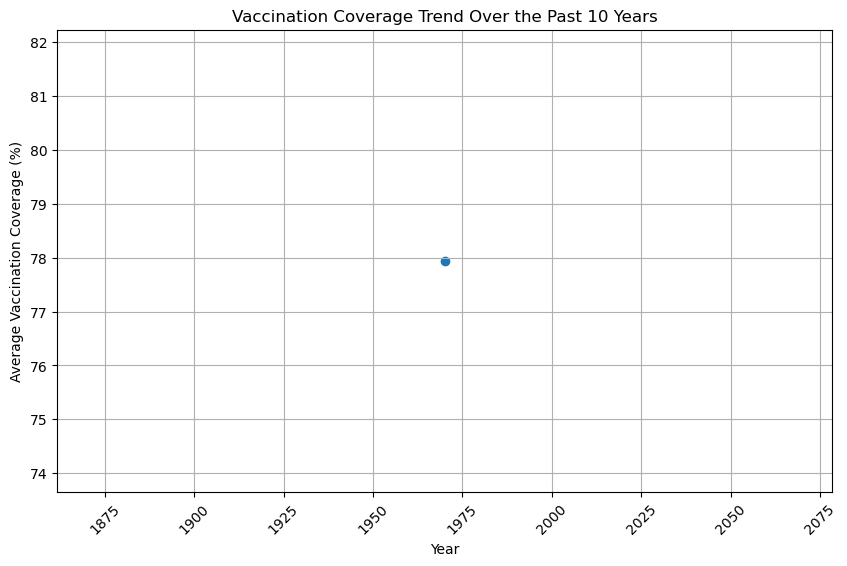

In [46]:
# Filter relevant columns
coverage_data = coverage[['YEAR', 'ANTIGEN', 'COVERAGE']]

# Group by year and calculate average coverage
coverage_trends = coverage_data.groupby('YEAR')['COVERAGE'].mean()

# Plot vaccination coverage trend
plt.figure(figsize=(10,6))
plt.scatter(coverage_trends.index, coverage_trends.values, )

plt.xlabel('Year')
plt.ylabel('Average Vaccination Coverage (%)')
plt.title('Vaccination Coverage Trend Over the Past 10 Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [47]:
coverage.head(3)

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,1970.0,BCG,BCG,ADMIN,Administrative coverage,278019173,3467241,78
1,COUNTRIES,ABW,Aruba,1970.0,BCG,BCG,OFFICIAL,Official coverage,278019173,3467241,78
2,COUNTRIES,ABW,Aruba,1970.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044,945,90


How do vaccine coverage rates differ across WHO regions?

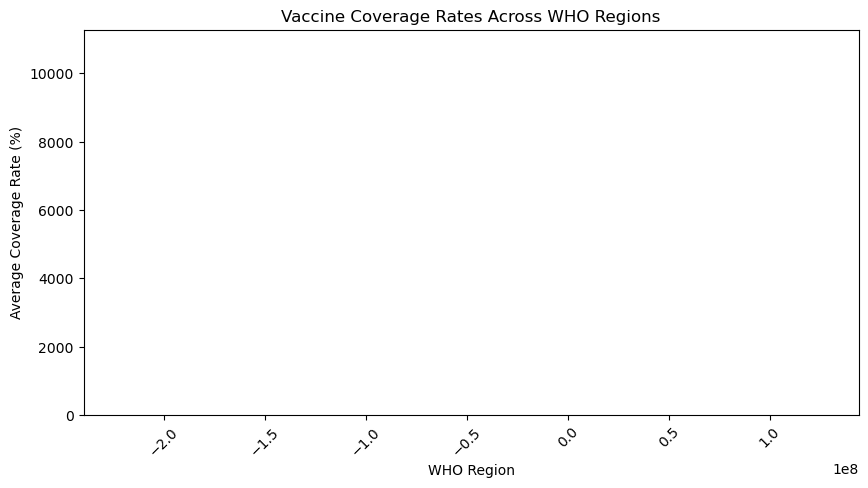

In [49]:
# Group by WHO region and compute average coverage rate
coverage_by_region = coverage.groupby("DOSES")["COVERAGE"].mean()

# Plot the coverage rates
plt.figure(figsize=(10, 5))
plt.bar(coverage_by_region.index, coverage_by_region.values, color="skyblue")

# Add labels and title
plt.xlabel("WHO Region")
plt.ylabel("Average Coverage Rate (%)")
plt.title("Vaccine Coverage Rates Across WHO Regions")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

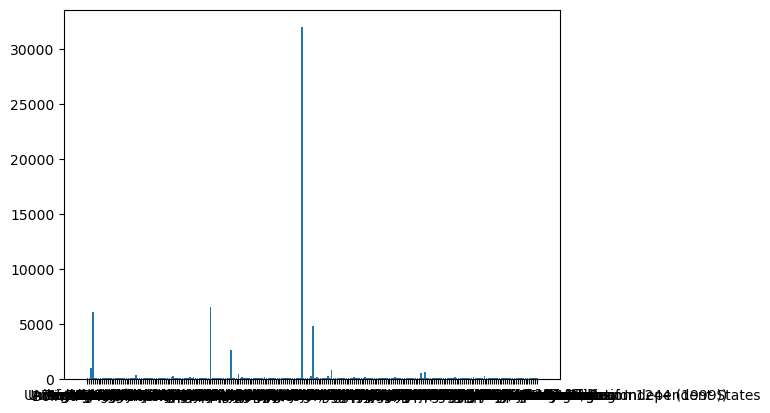

In [52]:
x = coverage['NAME']
y = coverage['COVERAGE']
# Perform linear regression
plt.bar(x,y)
plt.show()


How do vaccine coverage rates differ across WHO regions?

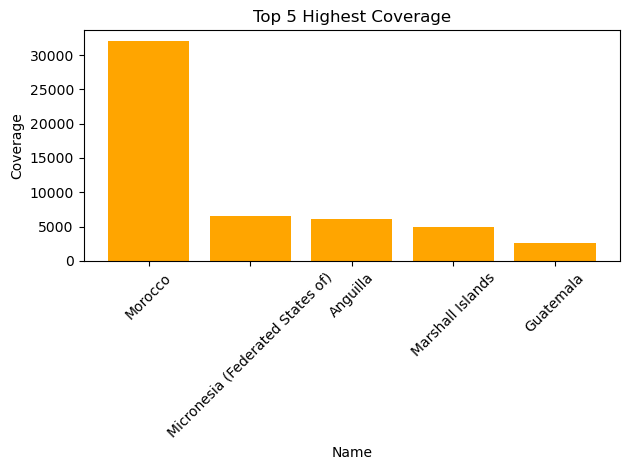

In [55]:
# Sort by COVERAGE in descending order and select top 5
top5 = coverage.sort_values(by='COVERAGE', ascending=False).head(5)

# Extract x and y for the chart
x = top5['NAME']
y = top5['COVERAGE']

# Plot
plt.bar(x, y, align='center', color='orange')
plt.xlabel('Name')
plt.ylabel('Coverage')
plt.title('Top 5 Highest Coverage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What percentage of the population is covered by newly introduced vaccines?

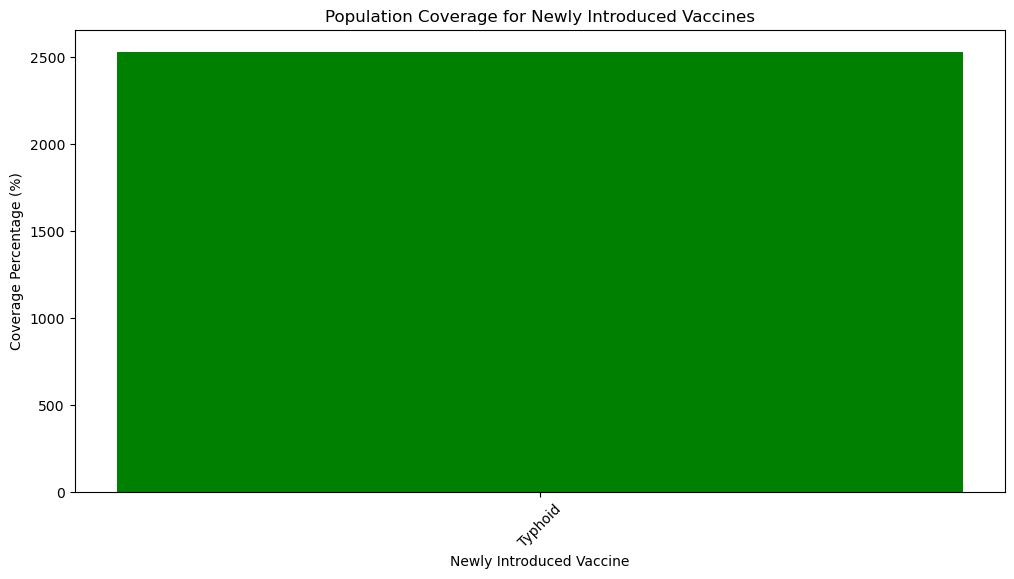

In [56]:
new_vaccines = vaccine_int[vaccine_int["INTRO"] == "Yes"]["DESCRIPTION"]

# Merge with coverage data
merged_df = coverage[coverage["ANTIGEN_DESCRIPTION"].isin(new_vaccines)]

# Compute total population covered per vaccine
coverage_rates = (merged_df["DOSES"] / merged_df["TARGET_NUMBER"]) * 100

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(merged_df["ANTIGEN_DESCRIPTION"], coverage_rates, color="green")

# Add labels and title
plt.xlabel("Newly Introduced Vaccine")
plt.ylabel("Coverage Percentage (%)")
plt.title("Population Coverage for Newly Introduced Vaccines")
plt.xticks(rotation=45)

# Display the chart
plt.show()



Which vaccines have the highest coverage globally?

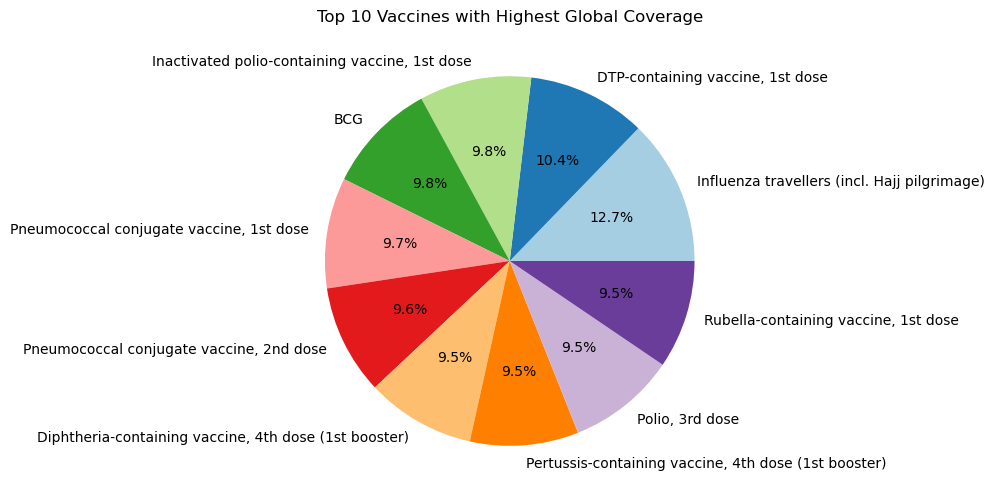

In [61]:
# Group by vaccine and calculate average coverage
coverage_by_vaccine = coverage.groupby("ANTIGEN_DESCRIPTION")["COVERAGE"].mean()

# Sort to get top-performing vaccines
top_vaccines = coverage_by_vaccine.sort_values(ascending=False).head(10)  # Top 10 vaccines

# Plot the coverage rates as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_vaccines.values, labels=top_vaccines.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)

# Add title
plt.title("Top 10 Vaccines with Highest Global Coverage")

# Show the plot
plt.show()



What is the variability in coverage among different countries for the same vaccine?

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_3464\1920327774.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([filtered_df[filtered_df["NAME"] == country]["COVERAGE"]


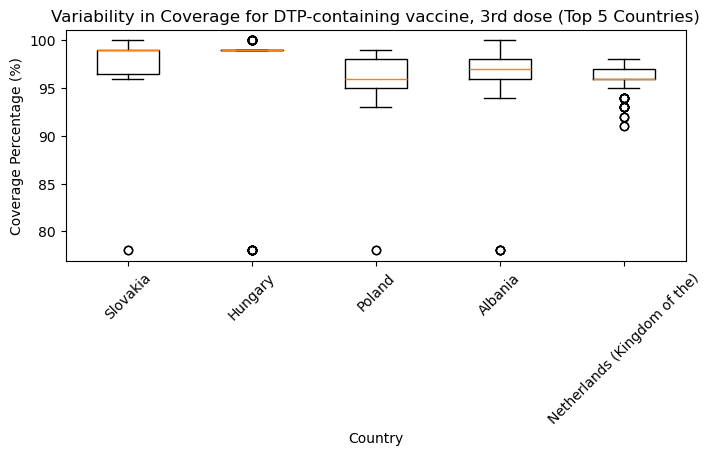

In [ ]:
# Choose a specific vaccine 
vaccine_name = "DTP-containing vaccine, 3rd dose"
selected_vaccine_df = coverage[coverage["ANTIGEN_DESCRIPTION"] == vaccine_name]

# Compute average coverage per country and get the top 5
top_countries = selected_vaccine_df.groupby("NAME")["COVERAGE"].mean().nlargest(5).index

# Filter dataset to include only these top 5 countries
filtered_df = selected_vaccine_df[selected_vaccine_df["NAME"].isin(top_countries)]

# Create a box plot for the top 5 countries
plt.figure(figsize=(8, 3))
plt.boxplot([filtered_df[filtered_df["NAME"] == country]["COVERAGE"]
             for country in top_countries], labels=top_countries)

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Coverage Percentage (%)")
plt.title(f"Variability in Coverage for {vaccine_name} (Top 5 Countries)")
plt.xticks(rotation=45)

# Show the plot
plt.show()



Are certain vaccines consistently achieving high coverage across all regions?

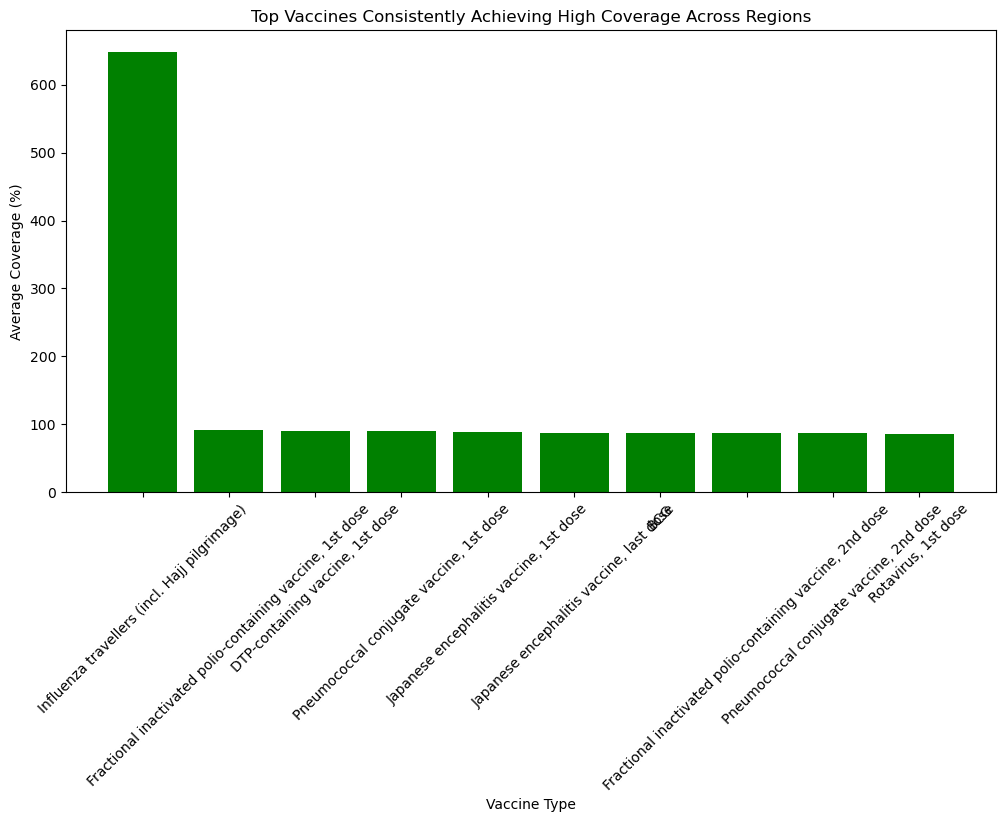

In [72]:
# Group by vaccine and WHO region, then compute average coverage
coverage_by_vaccine = coverage.groupby(["ANTIGEN_DESCRIPTION", "DOSES"])["COVERAGE"].mean().reset_index()

# Find vaccines with consistently high coverage (e.g., average >90% across regions)
high_coverage_vaccines = coverage_by_vaccine.groupby("ANTIGEN_DESCRIPTION")["COVERAGE"].mean().nlargest(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(high_coverage_vaccines.index, high_coverage_vaccines.values, color="green")

# Add labels and title
plt.xlabel("Vaccine Type")
plt.ylabel("Average Coverage (%)")
plt.title("Top Vaccines Consistently Achieving High Coverage Across Regions")
plt.xticks(rotation=45)
plt.show()



How does the coverage rate vary for different vaccines within the same country?

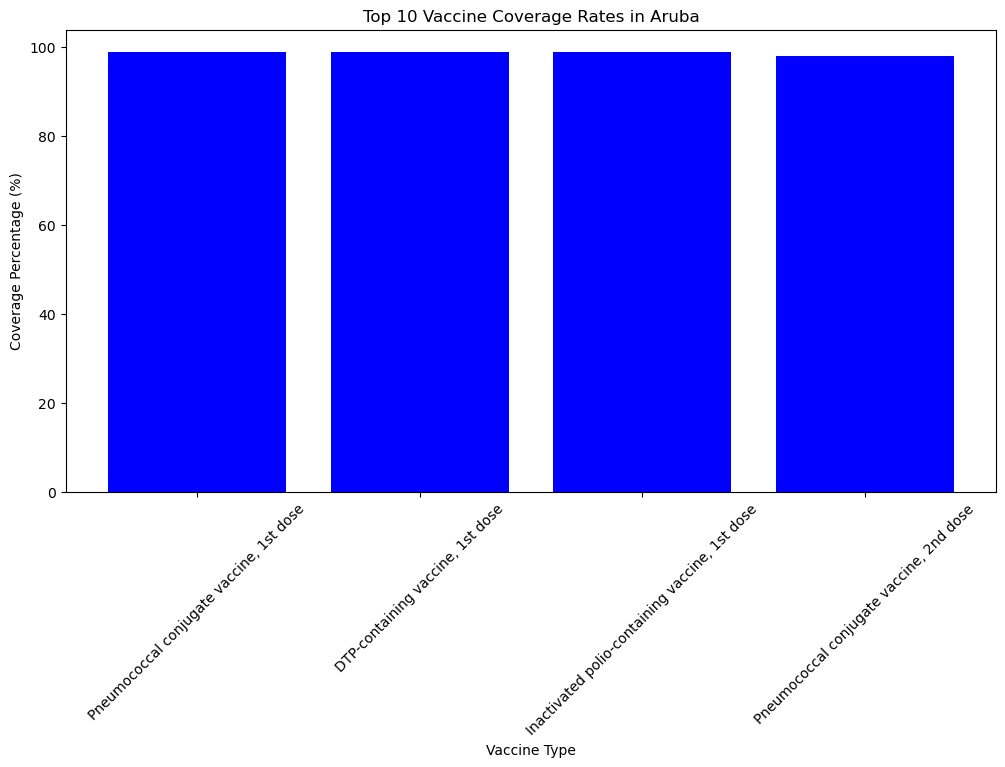

In [77]:
# Choose a country (e.g., Aruba)
country_name = "Aruba"
country_df = coverage[coverage["NAME"] == country_name]

# Sort vaccines by coverage percentage and keep only the top 10
top_vaccines = country_df.sort_values(by="COVERAGE", ascending=False).head(20)

# Create a bar chart for the top 10 vaccines
plt.figure(figsize=(12, 6))
plt.bar(top_vaccines["ANTIGEN_DESCRIPTION"], top_vaccines["COVERAGE"], color="blue")

# Add labels and title
plt.xlabel("Vaccine Type")
plt.ylabel("Coverage Percentage (%)")
plt.title(f"Top 10 Vaccine Coverage Rates in {country_name}")
plt.xticks(rotation=45)

# Show the plot
plt.show()



What is the total number of doses administered globally for a specific vaccine?

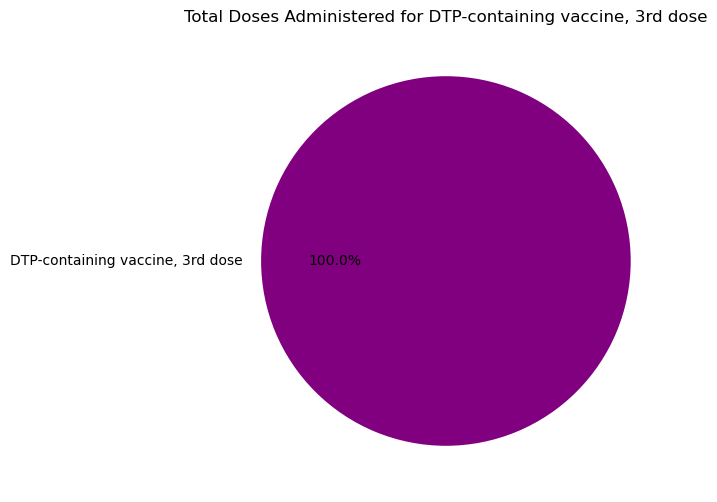

Total doses administered globally for DTP-containing vaccine, 3rd dose: 101958480303


In [ ]:
# Choose a specific vaccine (e.g., "DTP-containing vaccine, 3rd dose")
vaccine_name = "DTP-containing vaccine, 3rd dose"

# Filter dataset for the selected vaccine
selected_vaccine_df = coverage[coverage["ANTIGEN_DESCRIPTION"] == vaccine_name]

# Calculate total doses administered globally
total_doses = selected_vaccine_df["DOSES"].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie([total_doses], labels=[vaccine_name], autopct="%1.1f%%", colors=["purple"])

# Add title
plt.title(f"Total Doses Administered for {vaccine_name}")

# Show the plot
plt.show()



### Incidence Table

In [86]:
incidence.head(3)

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,10000,0
1,COUNTRIES,ABW,Aruba,2023,DIPHTHERIA,Diphtheria,10000,0
2,COUNTRIES,ABW,Aruba,2023,INVASIVE_MENING,Invasive meningococcal disease,10000,9


What is the incidence rate trend for measles over the past decade?

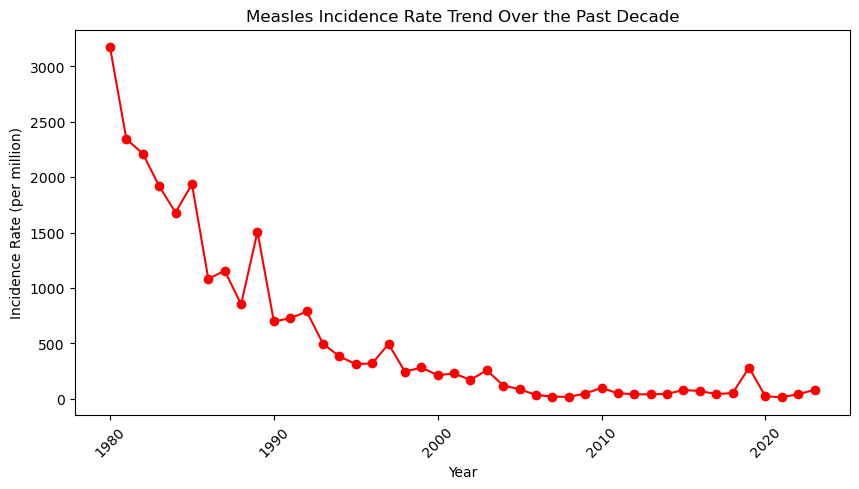

In [80]:
# Filter for measles cases over the past decade
measles_trend = incidence[incidence["DISEASE_DESCRIPTION"] == "Measles"]
measles_trend = measles_trend.groupby("YEAR")["INCIDENCE_RATE"].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(measles_trend["YEAR"], measles_trend["INCIDENCE_RATE"], marker="o", linestyle="-", color="red")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Incidence Rate (per million)")
plt.title("Measles Incidence Rate Trend Over the Past Decade")
plt.xticks(rotation=45)

# Show the plot
plt.show()



Which country has the highest reported incidence rate for a particular disease?

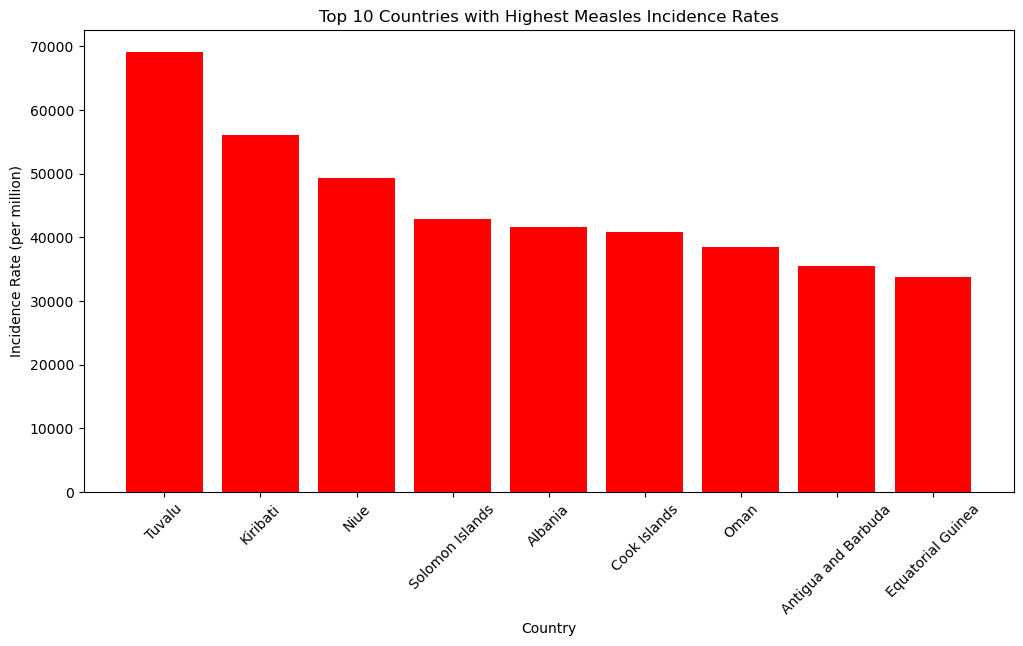

In [82]:
# Choose a specific disease (e.g., "Measles")
disease_name = "Measles"
disease_df = incidence[incidence["DISEASE_DESCRIPTION"] == disease_name]

# Identify the country with the highest incidence rate
highest_incidence_country = disease_df.loc[disease_df["INCIDENCE_RATE"].idxmax()]


# Bar plot of top 10 countries
top_countries = disease_df.sort_values(by="INCIDENCE_RATE", ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_countries["NAME"], top_countries["INCIDENCE_RATE"], color="red")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Incidence Rate (per million)")
plt.title(f"Top 10 Countries with Highest {disease_name} Incidence Rates")
plt.xticks(rotation=45)

# Show the plot
plt.show()



How do incidence rates differ between WHO regions?

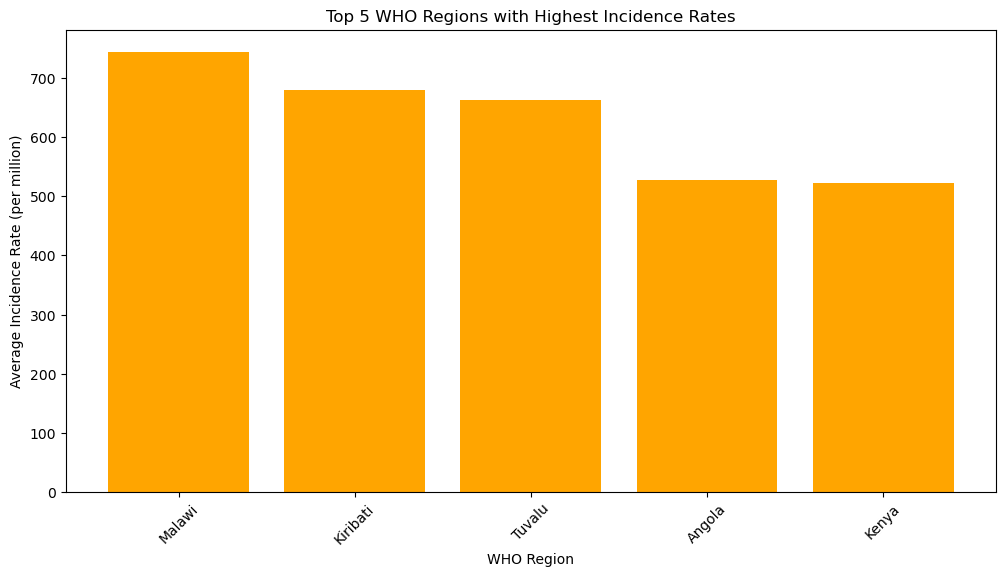

In [88]:
# Group by WHO region and calculate average incidence rate
incidence_by_region = incidence.groupby("NAME")["INCIDENCE_RATE"].mean()

# Sort and select the top 5 WHO regions with the highest incidence rates
top_regions = incidence_by_region.sort_values(ascending=False).head(5)

# Create a bar chart for the top 5 WHO regions
plt.figure(figsize=(12, 6))
plt.bar(top_regions.index, top_regions.values, color="orange")

# Add labels and title
plt.xlabel("WHO Region")
plt.ylabel("Average Incidence Rate (per million)")
plt.title("Top 5 WHO Regions with Highest Incidence Rates")
plt.xticks(rotation=45)

plt.show()



What is the most prevalent disease in terms of incidence rate across all countries?

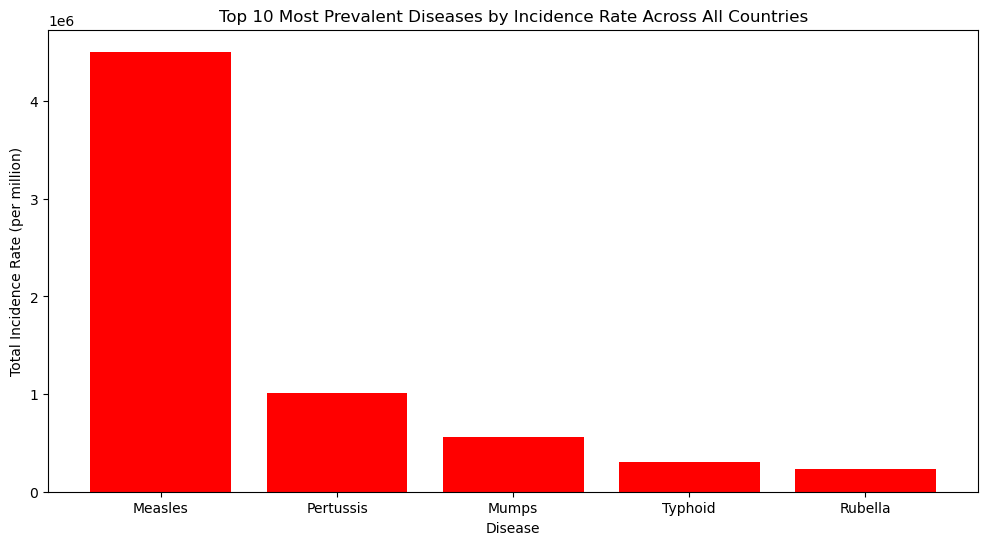

In [95]:
# Group by disease and calculate total incidence rate across all countries
disease_incidence = incidence.groupby("DISEASE_DESCRIPTION")["INCIDENCE_RATE"].sum()

# Sort and select the top 10 diseases with the highest incidence rates
top_diseases = disease_incidence.sort_values(ascending=False).head(5)

# Create a bar chart for the most prevalent diseases
plt.figure(figsize=(12, 6))
plt.bar(top_diseases.index, top_diseases.values, color="red")

# Add labels and title
plt.xlabel("Disease")
plt.ylabel("Total Incidence Rate (per million)")
plt.title("Top 10 Most Prevalent Diseases by Incidence Rate Across All Countries")
# plt.xticks(rotation=45)

# Show the plot
plt.show()



Which diseases have shown the largest reduction in incidence over time?

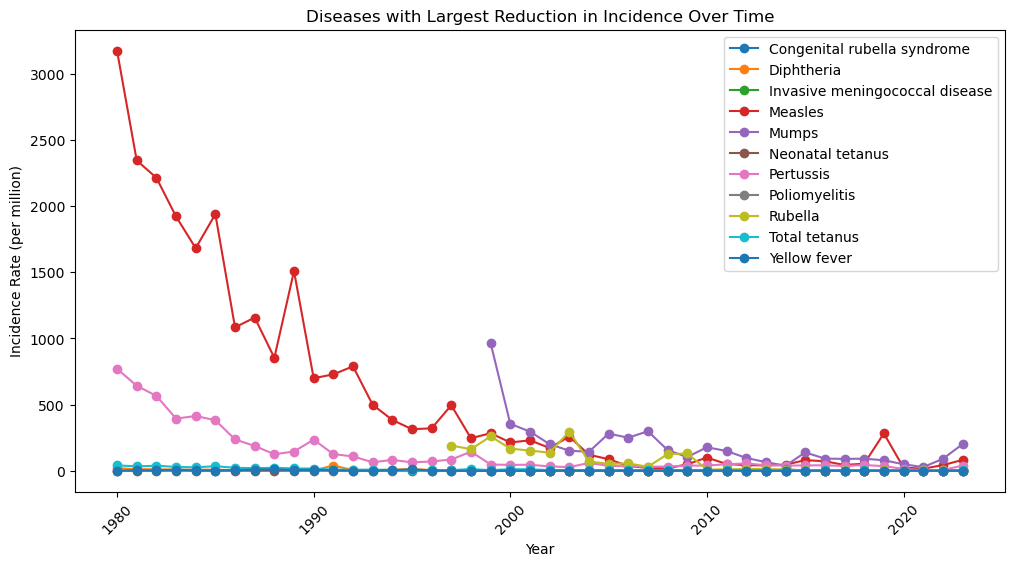

In [99]:
# Identify diseases with the largest reduction in incidence rates
incidence_trend = incidence.groupby(["YEAR", "DISEASE_DESCRIPTION"])["INCIDENCE_RATE"].mean().reset_index()
pivot_table = incidence_trend.pivot(index="YEAR", columns="DISEASE_DESCRIPTION", values="INCIDENCE_RATE")

# Select diseases with the largest decline over time
declining_diseases = pivot_table.loc[:, (pivot_table.diff().sum() < 0)]  # Identifies diseases with decreasing trend

# Plot incidence trends for declining diseases
plt.figure(figsize=(12, 6))
for disease in declining_diseases.columns:
    plt.plot(declining_diseases.index, declining_diseases[disease], marker="o", label=disease)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Incidence Rate (per million)")
plt.title("Diseases with Largest Reduction in Incidence Over Time")
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.show()



### Reported Table

What is the trend of reported cases for polio over the last decade?

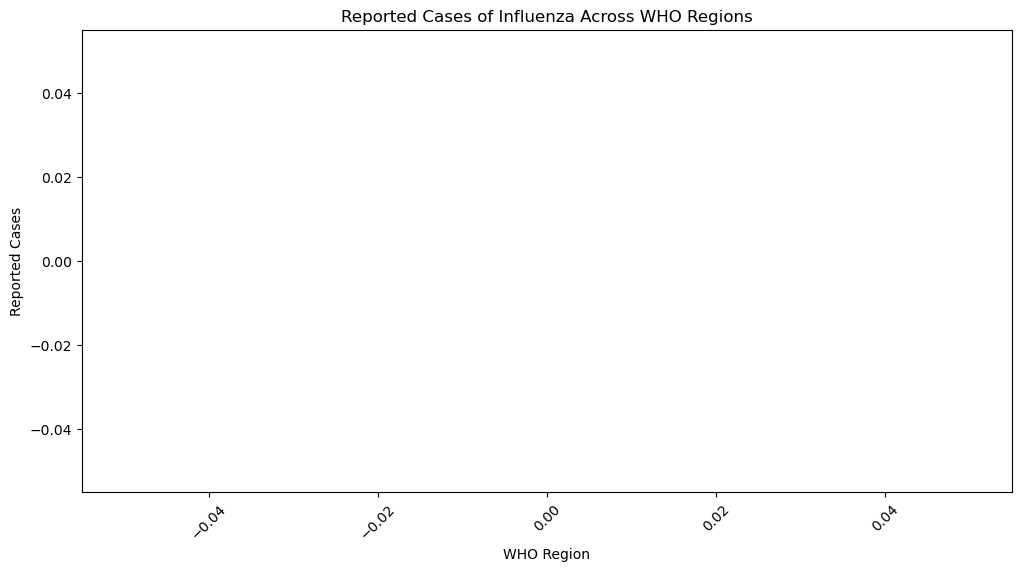

In [123]:

# Choose a specific disease (e.g., "Influenza")
disease_name = "Influenza"
disease_df = reported[reported["DISEASE_DESCRIPTION"] == disease_name]

# Group by WHO region and sum reported cases
cases_by_region = disease_df.groupby("NAME")["CASES"].sum()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(cases_by_region.index, cases_by_region.values, color="blue")

# Add labels and title
plt.xlabel("WHO Region")
plt.ylabel("Reported Cases")
plt.title(f"Reported Cases of {disease_name} Across WHO Regions")
plt.xticks(rotation=45)

# Show the plot
plt.show()



Which diseases have seen a consistent decline in reported cases over time?

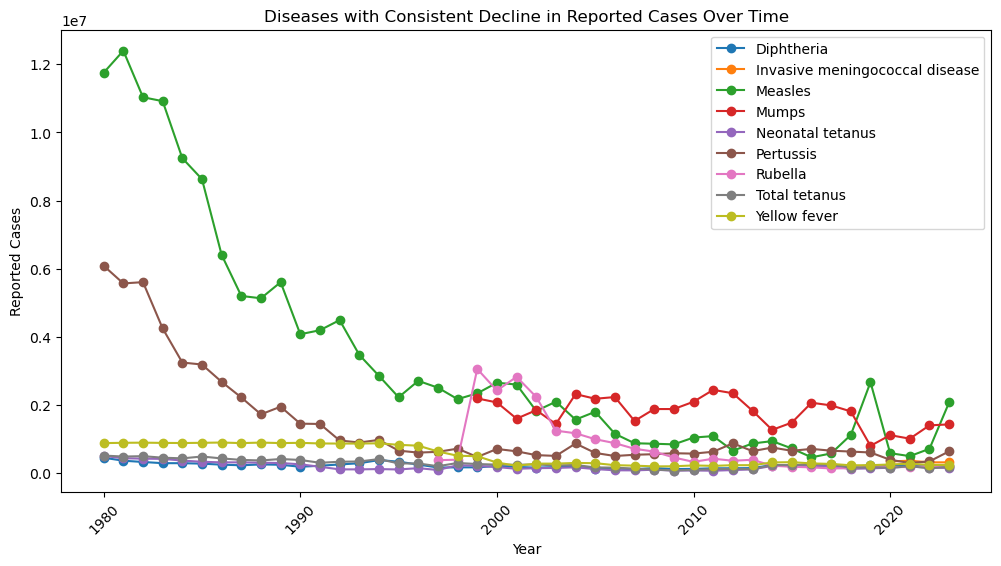

In [125]:
# Identify diseases with a consistent decline in reported cases
reported_trend = reported.groupby(["YEAR", "DISEASE_DESCRIPTION"])["CASES"].sum().reset_index()
pivot_table = reported_trend.pivot(index="YEAR", columns="DISEASE_DESCRIPTION", values="CASES")

# Select diseases with a steady decline over time
declining_diseases = pivot_table.loc[:, (pivot_table.diff().sum() < 0)]  # Identifies diseases with decreasing trend

# Plot incidence trends for declining diseases
plt.figure(figsize=(12, 6))
for disease in declining_diseases.columns:
    plt.plot(declining_diseases.index, declining_diseases[disease], marker="o", label=disease)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Reported Cases")
plt.title("Diseases with Consistent Decline in Reported Cases Over Time")
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.show()



Which diseases have the highest case numbers despite vaccine availability?

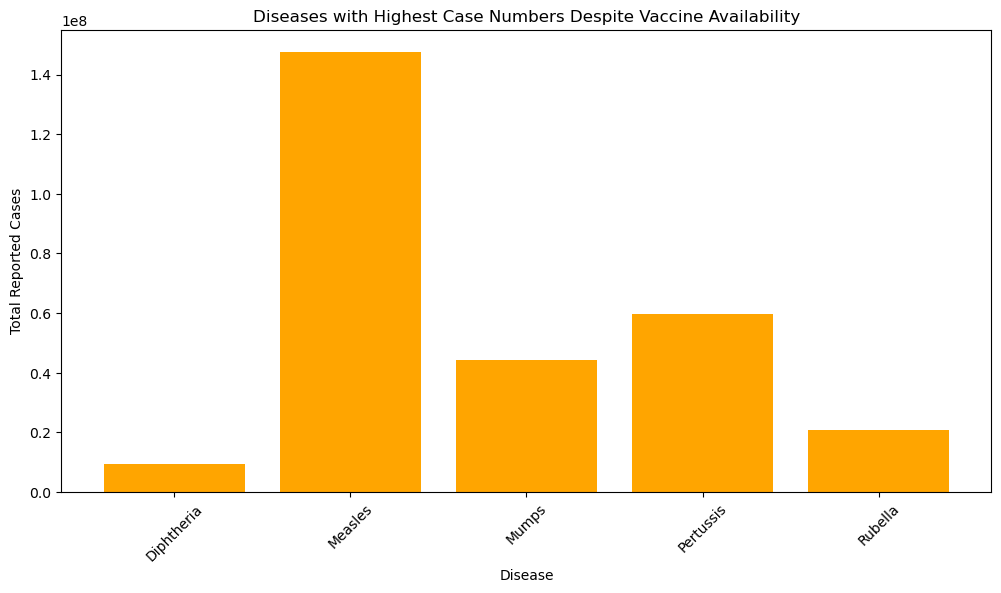

In [129]:
# List of vaccine-preventable diseases with high case numbers
vaccinated_diseases = ["Measles", "Pertussis", "Diphtheria", "Polio", "Rubella", "Mumps", "Yellow Fever"]

# Filter dataset for selected diseases
filtered_df = reported[reported["DISEASE_DESCRIPTION"].isin(vaccinated_diseases)]

# Group by disease and sum reported cases globally
cases_by_disease = filtered_df.groupby("DISEASE_DESCRIPTION")["CASES"].sum()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(cases_by_disease.index, cases_by_disease.values, color="orange")

# Add labels and title
plt.xlabel("Disease")
plt.ylabel("Total Reported Cases")
plt.title("Diseases with Highest Case Numbers Despite Vaccine Availability")
plt.xticks(rotation=45)

# Show the plot
plt.show()



How do countries differ in their reporting of disease cases?

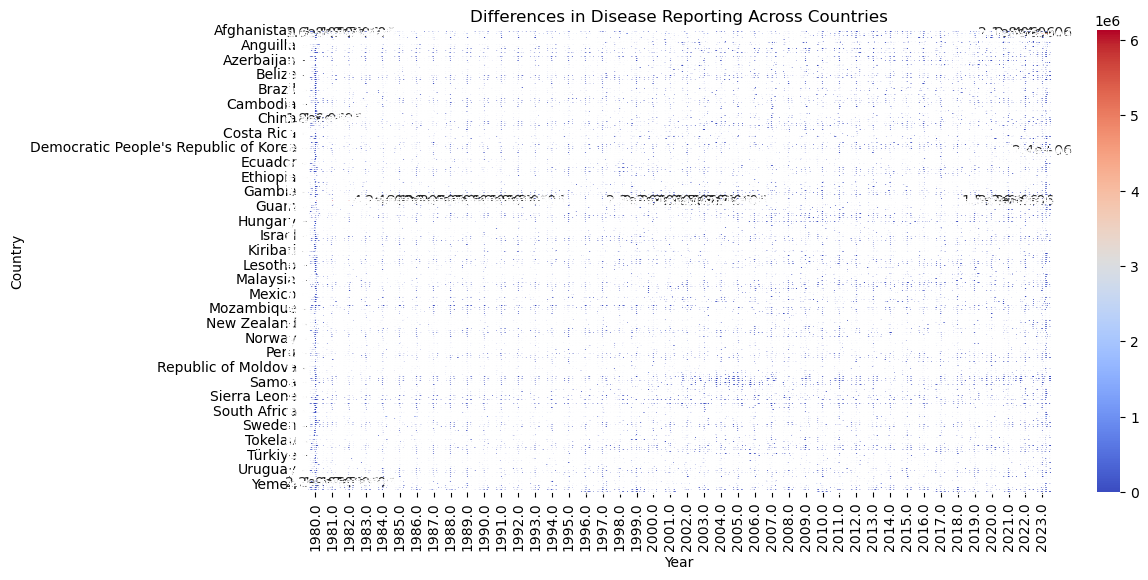

In [ ]:
# Group by country and year to analyze trends
heatmap_data = reported.groupby(["NAME", "YEAR"])["CASES"].sum().unstack()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True,  linewidths=0.5)


# Add labels and title
plt.xlabel("Year")
plt.ylabel("Country")
plt.title("Differences in Disease Reporting Across Countries")

# Show the plot
plt.show()



### Vaccine_int

Which year vaccines were most recently introduced globally?

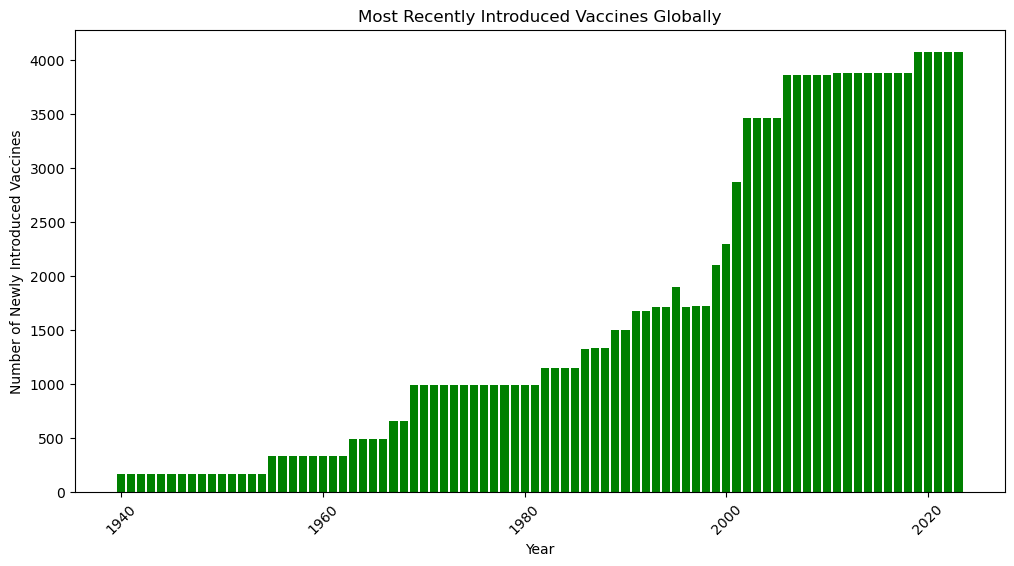

In [136]:
# Group by year and count newly introduced vaccines
vaccine_trend = vaccine_int.groupby("YEAR")["INTRO"].count().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(vaccine_trend["YEAR"], vaccine_trend["INTRO"], color="green")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of Newly Introduced Vaccines")
plt.title("Most Recently Introduced Vaccines Globally")
plt.xticks(rotation=45)

# Show the plot
plt.show()



Are some regions introducing vaccines at a faster rate than others?

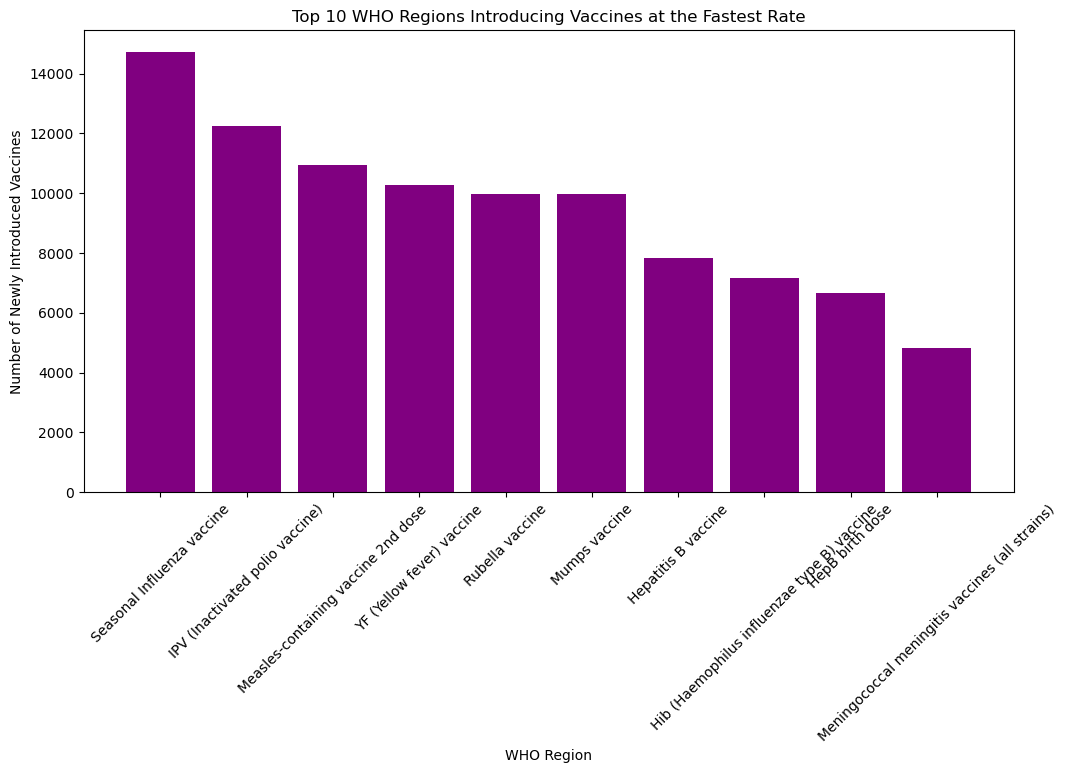

In [139]:
# Group by WHO region and count newly introduced vaccines
vaccine_trend = vaccine_int.groupby("DESCRIPTION")["INTRO"].count().reset_index()

# Sort by highest vaccine introductions and select top 10
top_10_regions = vaccine_trend.sort_values(by="INTRO", ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_regions["DESCRIPTION"], top_10_regions["INTRO"], color="purple")

# Add labels and title
plt.xlabel("WHO Region")
plt.ylabel("Number of Newly Introduced Vaccines")
plt.title("Top 10 WHO Regions Introducing Vaccines at the Fastest Rate")
plt.xticks(rotation=45)

# Show the plot
plt.show()



Which countries have introduced a new vaccine in the past five years?

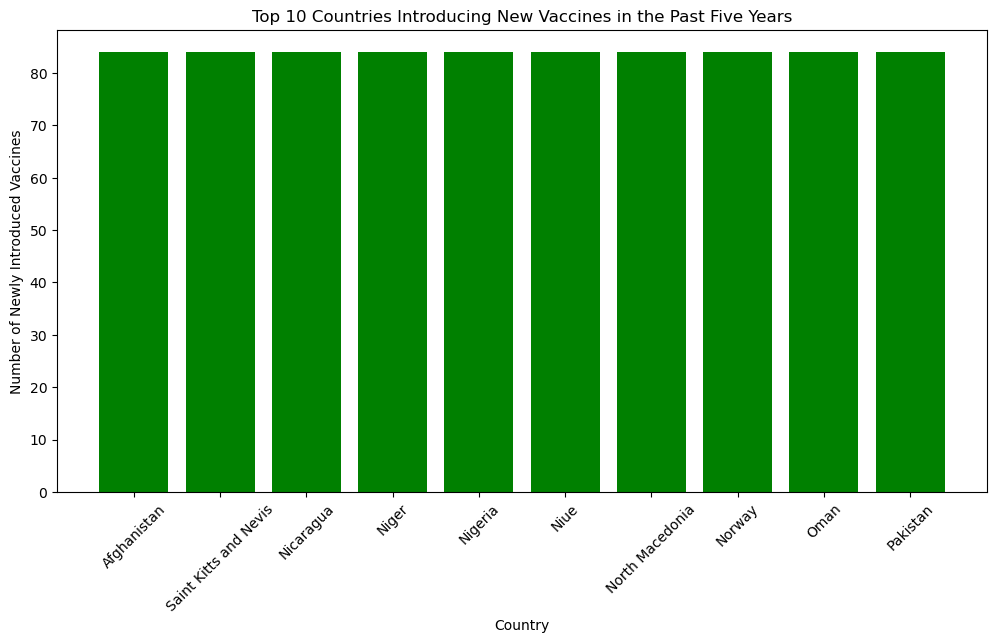

In [141]:
# Filter for vaccine introductions in the past five years
recent_vaccine_df = vaccine_int[vaccine_int["YEAR"] >= 2020]

# Group by country and count newly introduced vaccines
vaccine_trend = recent_vaccine_df.groupby("COUNTRYNAME")["DESCRIPTION"].count().reset_index()

# Sort by highest vaccine introductions and select top 10
top_10_countries = vaccine_trend.sort_values(by="DESCRIPTION", ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries["COUNTRYNAME"], top_10_countries["DESCRIPTION"], color="green")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Number of Newly Introduced Vaccines")
plt.title("Top 10 Countries Introducing New Vaccines in the Past Five Years")
plt.xticks(rotation=45)

# Show the plot
plt.show()



What is the overall rate of vaccine introduction over time?

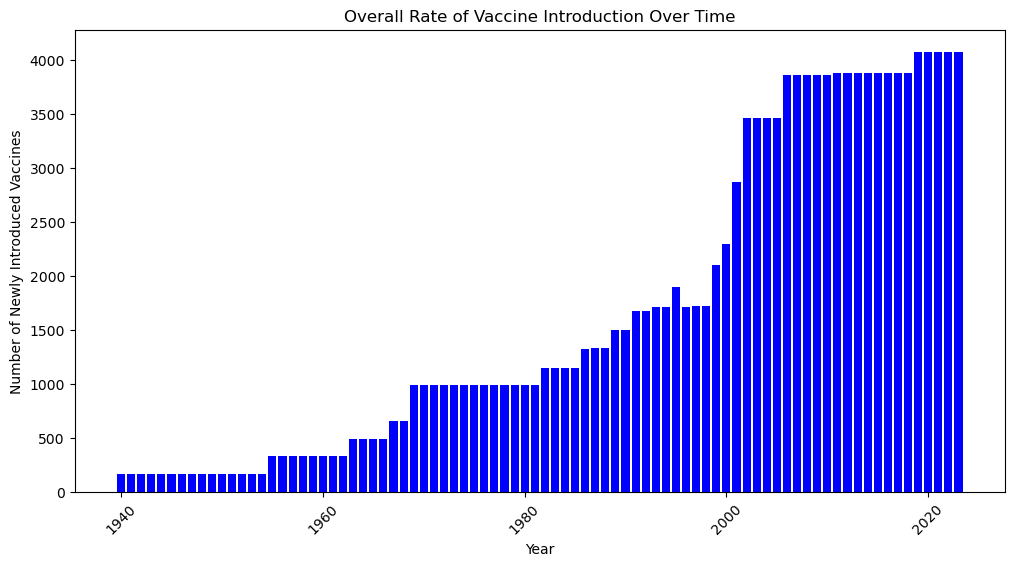

In [143]:
# Group by year and count newly introduced vaccines
vaccine_trend = vaccine_int.groupby("YEAR")["DESCRIPTION"].count().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(vaccine_trend["YEAR"], vaccine_trend["DESCRIPTION"], color="blue")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of Newly Introduced Vaccines")
plt.title("Overall Rate of Vaccine Introduction Over Time")
plt.xticks(rotation=45)

# Show the plot
plt.show()



What is the trend in the number of scheduled vaccine doses across countries?

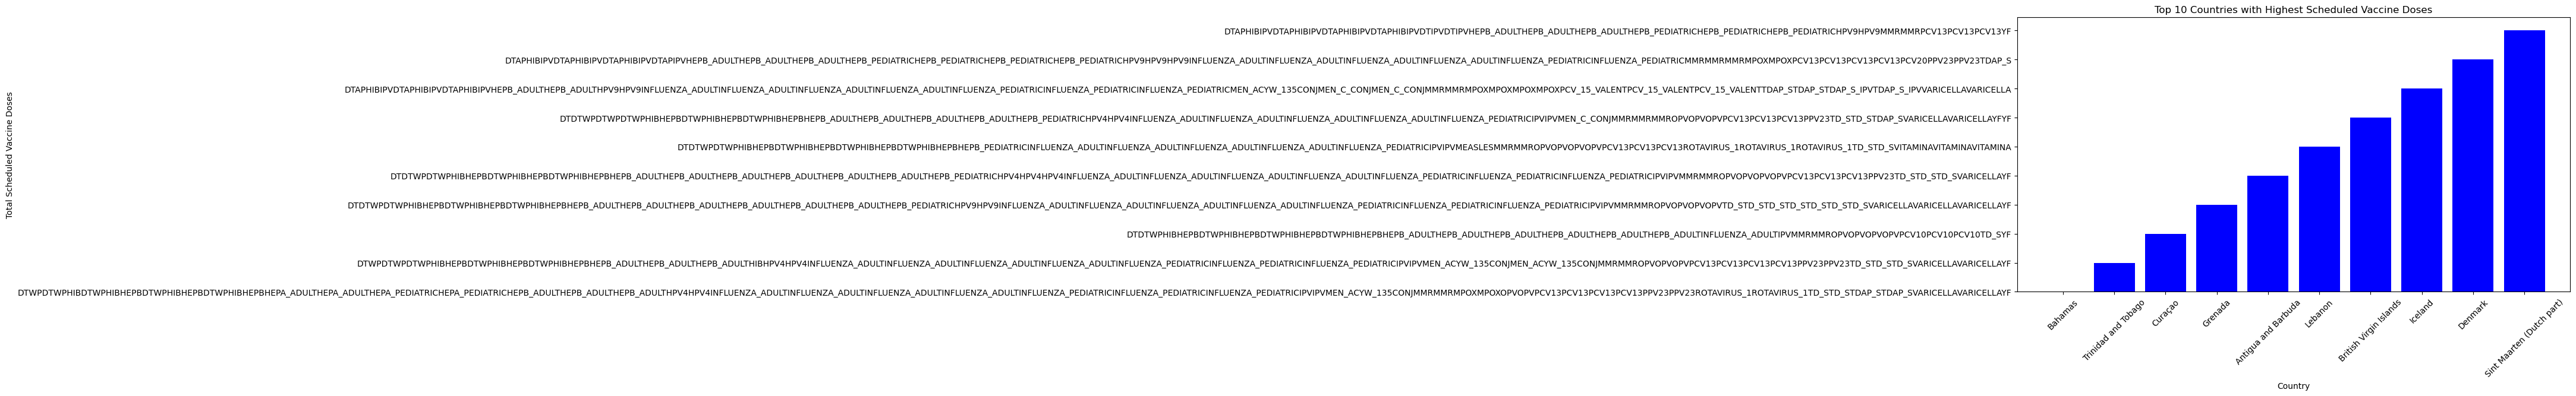

In [145]:
# Group by country and count scheduled vaccine doses
vaccine_trend = vaccine_sch.groupby("COUNTRYNAME")["VACCINECODE"].sum().reset_index()

# Sort by highest scheduled doses and select top 10
top_10_countries = vaccine_trend.sort_values(by="VACCINECODE", ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries["COUNTRYNAME"], top_10_countries["VACCINECODE"], color="blue")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Total Scheduled Vaccine Doses")
plt.title("Top 10 Countries with Highest Scheduled Vaccine Doses")
plt.xticks(rotation=45)

# Show the plot
plt.show()



What is the most common age for administering the first vaccine dose?

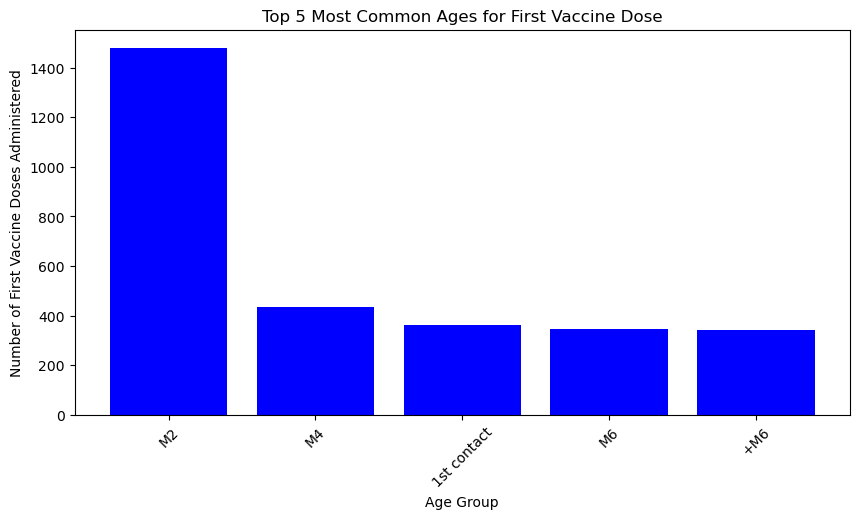

In [150]:
# Group by age and count first vaccine doses
vaccine_trend = vaccine_sch.groupby("AGEADMINISTERED")["VACCINECODE"].count().reset_index()

# Sort by highest first vaccine doses and select top 5
top_5_ages = vaccine_trend.sort_values(by="VACCINECODE", ascending=False).head(5)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_5_ages["AGEADMINISTERED"], top_5_ages["VACCINECODE"], color="blue")

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of First Vaccine Doses Administered")
plt.title("Top 5 Most Common Ages for First Vaccine Dose")
plt.xticks(rotation=45)

# Show the plot
plt.show()



How do vaccine schedules impact the total number of doses administered in a country?

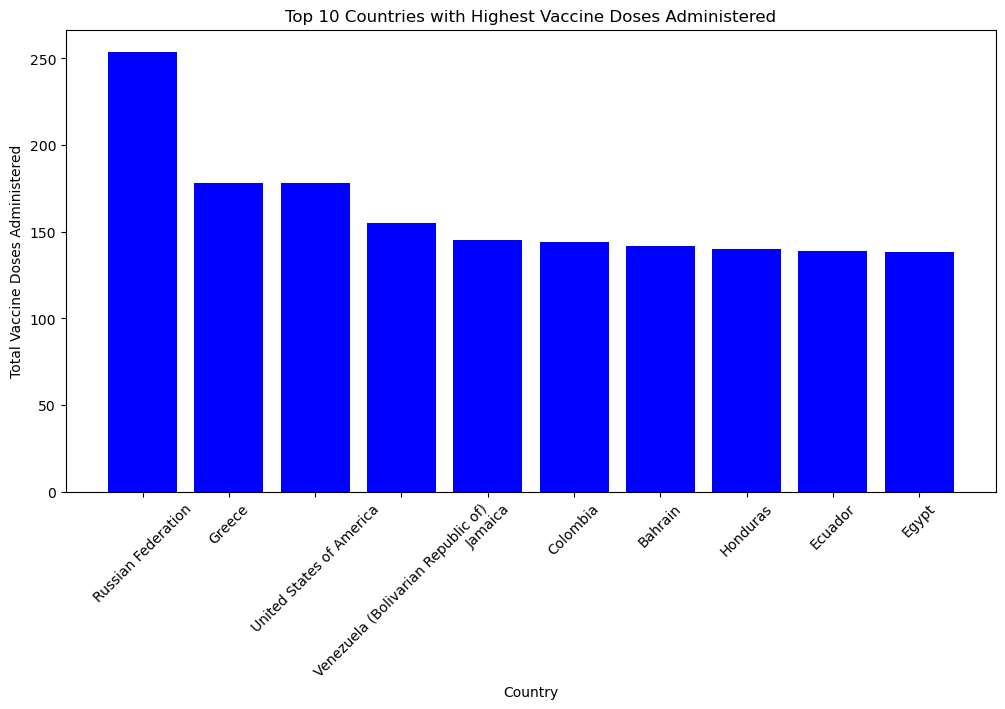

In [152]:
# Group by country and sum total doses administered
vaccine_trend = vaccine_sch.groupby("COUNTRYNAME")["SCHEDULEROUNDS"].sum().reset_index()

# Sort by highest total doses and select top 10
top_10_countries = vaccine_trend.sort_values(by="SCHEDULEROUNDS", ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries["COUNTRYNAME"], top_10_countries["SCHEDULEROUNDS"], color="blue")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Total Vaccine Doses Administered")
plt.title("Top 10 Countries with Highest Vaccine Doses Administered")
plt.xticks(rotation=45)

# Show the plot
plt.show()

